In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, StandardScaler
# Train test metodunun daha karmaşık fakat daha güvenilir olmasını sağlar.
from sklearn.model_selection import  KFold
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import TfidfVectorizer
# Veri setindeki özel karakterleri atar.
from unidecode import unidecode
from sentence_transformers import SentenceTransformer
from catboost import CatBoostRegressor



import optuna
import re
import shap
import warnings
warnings.filterwarnings('ignore')

C:\Users\Zafer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
train_df = pd.read_csv('train.csv').dropna(subset="Degerlendirme Puani")
test_df = pd.read_csv('test_x.csv')

In [3]:
train_df.describe(include = ['int', 'float'])


,Basvuru Yili,Degerlendirme Puani,Burslu ise Burs Yuzdesi,id
count,65124.00000,65124.000000,22440.000000,65124.000000
mean,2018.27724,32.086466,34.226181,32561.500000
std,2.66996,18.139239,41.632412,18799.823802
min,2014.00000,0.000000,0.000000,0.000000
25%,2016.00000,18.000000,0.000000,16280.750000
50%,2019.00000,29.000000,0.000000,32561.500000
75%,2021.00000,44.000000,75.000000,48842.250000
max,2022.00000,102.000000,100.000000,65123.000000


In [4]:
for i in range(0,60,20):
    display(train_df[train_df.columns[i:i+20]].describe(include = ['object']))


,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger
count,64955,64947,64333,63087,64992,64869,65124,64893,64750,62371,27780,64740,4733,64070,64277,64115,1526
unique,4,13498,2230,319,527,4,5,7748,12,20,2,31950,4010,888,16,887,862
top,Kadın,1/1/70 2:00,İstanbul,İstanbul,İSTANBUL ÜNİVERSİTESİ,Devlet,Hayır,Endüstri Mühendisliği,2,3.00-2.50,Hayır,------,Atatürk Anadolu Lisesi,İstanbul,Anadolu Lisesi,Sayısal,Bilişim Teknolojileri
freq,32076,1655,8682,16625,2083,37884,51977,2434,21773,10758,26624,4251,8,8868,13367,28980,84


,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?
count,59207,64893,21147,20962,64718,53228,30587,64117,52506,44746,63992.0,63295,16434,64009,32849,52282,15606,36817,52284,14598
unique,19,2,3959,587,21,3,8,22,3,8,28.0,2,13423,2,9,2,9489,2,2,9285
top,75 - 100,Hayır,-,-,İlkokul,Hayır,0,Lise,Evet,Özel Sektör,1.0,Hayır,IEEE,Hayır,0,Hayır,-,Hayır,Hayır,-
freq,22432,48513,4711,4724,10350,39370,11780,10008,28558,11293,16186.0,33709,203,42243,11315,37716,2956,19661,33919,5196


,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite"
count,58670,28592,419
unique,2,4,168
top,Evet,Orta,Anadolu Üniversitesi
freq,48871,13057,26


In [5]:
train_df.nunique().sort_values(ascending=False)[:20]

id                                                           65124
Lise Adi                                                     31950
Dogum Tarihi                                                 13498
Uye Oldugunuz Kulubun Ismi                                   13423
Hangi STK'nin Uyesisiniz?                                     9489
Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?     9285
Bölüm                                                         7748
Lise Adi Diger                                                4010
Burs Aldigi Baska Kurum                                       3959
Dogum Yeri                                                    2230
Lise Sehir                                                     888
Lise Bolumu                                                    887
Lise Bolum Diger                                               862
Baska Kurumdan Aldigi Burs Miktari                             587
Universite Adi                                                

In [6]:
sorted(list(train_df["Lise Adi"].unique().astype(str)))[:20]


[' Antalya Kepez Atatürk Anadolu Lisesi',
 ' BAHÇELIEVLER ŞEHIT OSMAN YILDIZ TICARET MESLEK ',
 ' Cumhuriyet Lisesi',
 ' Esenyurt lisesi',
 ' Çok programlı anadolu lisesi ',
 '(9-10-11)Yaşar Kımıl Fen Lisesi (12)Sınav Temel Lisesi',
 '(Söğütözü) Gazi Anadolu Lisesi',
 '-',
 '- FATİH KIZ ANADOLU İMAM HATİP LİSESİ (İSTANBUL - FATİH)',
 '------',
 '-Gaziantep Ömer Özmimar Anadolu İHL -Ankara Tevfik İleri Anadolu İHL. -İstanbul Tuzla Mahir İz Anadolu İHL(Açıköğretim Lisesi) (Son yazdığım okuldan mezun oldum, bunun sebebi son sınıfta İstanbul da bir kampa katılıp üniversiteye hazırlanmamdır)',
 '.',
 '.....',
 '0',
 '1.Murat Anadolu Lisesi',
 '10 Aralık Anadolu lisesi',
 '10 Aralık mesleki ve teknik Anadolu lisesi',
 '10 aralık mesleki ve teknik anadolu lisesi KASTAMONU',
 '10 numara',
 '10 saylı tam orta Mekteb']

In [7]:
sorted(list(train_df["Hangi STK'nin Uyesisiniz?"].unique().astype(str)))[:5]

[' Aiesec',
 ' Genç engelliler Gençlik ve Spor Kulubü',
 '!Kızılay Gönüllüsü !Türkiye Eğitim Gönüllüleri Vakfı Gönüllsü (TEGV)',
 '"Aynı Dili Konuşalım" adında maddi durumu yetersiz ve dil öğrenme konusunda motivasyonu yüksek öğrencilere birçok farklı yabancı dili interaktif, canlı ve ücretsiz olarak öğretmeyi amaçladığımız gönüllülük projesinin iki kurucu ortağından biriyim. Son 1-1,5 yıldır çok yoğun bir şekilde projemizin fikirsel, teknik, iletişimsel, yönetimsel tüm süreçlerinde aktif olarak yer alıyorum. Bunun yanı sıra, "Düşlerim Gerçekleşiyor"da dezavantajlı çocukların gelişimi için gönüllü çalışmalarda bulunuyorum.',
 '"Spor İstanbul" aktif gönüllü üyesiyim.']

In [8]:
train_df = train_df[train_df["Basvuru Yili"]==2022].reset_index(drop=True)

dropcols = [
    'Lise Bolum Diger',
    'Burslu ise Burs Yuzdesi',
    'Daha Once Baska Bir Universiteden Mezun Olmus',
    'Lise Adi Diger',
    'Stk Projesine Katildiniz Mi?',
    'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite',
    'Ingilizce Seviyeniz?',
    'Uye Oldugunuz Kulubun Ismi',
    'id'
]

train_df = train_df.drop(columns=dropcols)
test_df = test_df.drop(columns=dropcols)

In [9]:
city_list = [
    'Adana', 'Adıyaman', 'Afyonkarahisar', 'Ağrı', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 
    'Ardahan', 'Artvin', 'Aydın', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik', 
    'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankırı', 'Çorum', 
    'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 
    'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Iğdır', 'Isparta', 'İstanbul', 
    'İzmir', 'Kahramanmaraş', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri', 
    'Kilis', 'Kırıkkale', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Kütahya', 
    'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 
    'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Şanlıurfa', 
    'Şırnak', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Uşak', 'Van', 'Yalova', 
    'Yozgat', 'Zonguldak'
]

city_list = [unidecode(city).lower() for city in city_list]

def find_city(ikametgah):
    for city in city_list:
        if city in unidecode(ikametgah).lower():
            return city
    return None

In [10]:
def clean_data(df):

    df['Dogum Tarihi'] = df['Dogum Tarihi'].str.extract(r'(\d{4})').astype(float)

    df['Dogum Yeri'] = df['Dogum Yeri'].fillna("").apply(find_city)
    df['Ikametgah Sehri'] = df['Ikametgah Sehri'].fillna("").apply(find_city)
    df['Lise Sehir'] = df['Lise Sehir'].fillna("").apply(find_city)

    lise_turu_mapping = {
        'Anadolu lisesi': 0,
        'Fen lisesi': 0,
        'Düz lise': 0,
        'Düz Lise': 0,
        'Meslek lisesi': 0,
        'Meslek Lisesi': 0,
        'Meslek': 0,
        'Özel': 1,
        'Özel lisesi': 1,
        'Özel Lisesi': 1,
        'Devlet': 0,
        'nan': np.nan,
        'Diğer': np.nan
    }

    df['Lise Turu'] = df['Lise Turu'].fillna("nan").map(lise_turu_mapping).astype(float)

    universite_turu_mapping = {
        'Devlet': 0,
        'Özel': 1,
        'nan': np.nan
    }

    df['Universite Turu'] = df['Universite Turu'].fillna("nan").map(universite_turu_mapping).astype(float)

    lise_mezuniyet_notu_mapping = {
        '0 - 24': 0,
        '25 - 50': 1,
        '50 - 75': 2,
        '100-85': 3,
        '4.00-3.50': 3,
        '84-70': 2,
        '3.50-3.00': 2,
        '3.50-3': 2,
        '69-55': 2,
        '3.00-2.50': 2,
        '2.50 ve altı': 0,
        '54-45': 1,
        '25 - 50': 1,
        '0 - 25': 0,
        '25 - 49': 1,
        '0 - 24': 0,
        '44-0': 1,
        'Not ortalaması yok': 0,
        '50 - 74': 2,
        '75 - 100': 3,
        '3.00 - 4.00': 3,
    }

    df['Lise Mezuniyet Notu'] = df['Lise Mezuniyet Notu'].fillna("nan").map(lise_mezuniyet_notu_mapping).astype(float)

    universite_notu_mapping = {
        '0 - 1.79': 0,
        '1.00 - 2.50': 0,
        '1.80 - 2.49': 0,
        '2.00 - 2.50': 1,
        '2.50 - 2.99': 1,
        '2.50 ve altı': 1,
        '3.00 - 3.50': 2,
        '3.00 - 3.49': 2,
        '3.00 - 4.00': 2,  
        '3.50 - 4.00': 3,
        '3.50-3': 2,
        'Hazırlığım': 0,
        'ORTALAMA BULUNMUYOR': 0,
        'Not ortalaması yok':0,
        'Ortalama bulunmuyor': 0,
        '4-3.5': 3,
        '4.0-3.5': 3,
        '3.00-2.50': 1,
        '2.50 -3.00': 1,
        '2.50 - 3.00': 1
    }

    df['Universite Not Ortalamasi'] = df['Universite Not Ortalamasi'].map(universite_notu_mapping).fillna("nan").astype(float)

    ebeveyn_egitim_mapping =  {
        'İlkokul': 1,
        'Lise': 3,
        'İlkokul Mezunu': 1,
        'İLKOKUL MEZUNU': 1,
        'Üniversite': 4,
        'Eğitimi yok': 0,
        'LİSE': 3,
        'Ortaokul': 2,
        'EĞİTİM YOK': 0,
        'ÜNİVERSİTE': 4,
        'Eğitim Yok': 0,
        'Ortaokul Mezunu': 2,
        'ORTAOKUL MEZUNU': 2,
        'Lise Mezunu': 3,
        'Üniversite Mezunu': 4,
        'Yüksek Lisans': 5,
        'YÜKSEK LİSANS': 5,
        'Yüksek Lisans / Doktora': 5,
        'Yüksek Lisans / Doktara': 5,
        'Doktora': 6,
        'DOKTORA': 6,
        'nan': np.nan
    }
    df['Anne Egitim Durumu'] = df['Anne Egitim Durumu'].replace(ebeveyn_egitim_mapping).fillna("nan").replace(ebeveyn_egitim_mapping).astype(float)
    df['Baba Egitim Durumu'] = df['Baba Egitim Durumu'].replace(ebeveyn_egitim_mapping).fillna("nan").replace(ebeveyn_egitim_mapping).astype(float)

    ebeveyn_sektor_mapping = {
        '0': 0,
        '-': 0,
        'ÖZEL SEKTÖR': 2,
        'Kamu':1,
        'KAMU': 1,
        'DİĞER': 3,
        'Özel Sektör': 2,
        'Diğer': 3,
        'nan': np.nan
    }
    df['Anne Sektor'] = df['Anne Sektor'].replace(ebeveyn_sektor_mapping).fillna("nan").replace(ebeveyn_sektor_mapping).astype(float)
    df['Baba Sektor'] = df['Baba Sektor'].replace(ebeveyn_sektor_mapping).fillna("nan").replace(ebeveyn_sektor_mapping).astype(float)
    
    df['Anne Calisma Durumu'] = df['Anne Calisma Durumu'].fillna("nan").str.lower().replace({'hayır': 0, 'evet': 1, 'nan': np.nan}).astype(float)
    df['Baba Calisma Durumu'] = df['Baba Calisma Durumu'].fillna("nan").str.lower().replace({'hayır': 0, 'evet': 1, 'nan': np.nan}).astype(float)


    spor_dali_mapping = {
        '-': 0,
        'nan': np.nan,
        'Diğer': 2,
        'Bireysel': 1,
        'Bireysel Spor': 1,
        'Takım Oyuncusu': 2,
        'Lider/Kaptan': 3
    }

    df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].fillna("nan").replace(spor_dali_mapping).astype(float)

    burs_miktari = {
        'nan': np.nan,
        '-': 0,
        '0 - 499₺': 1,
        '0 - 499 ₺':1,
        '500₺ - 999₺': 2,
        '1000₺ ve üstü': 3
    }

    df['Baska Kurumdan Aldigi Burs Miktari'] = df['Baska Kurumdan Aldigi Burs Miktari'].fillna("nan").replace(burs_miktari).astype(float)


    df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].fillna("nan").str.lower().replace({'hazırlık':0,'nan':np.nan}).astype(float)

    df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].fillna("nan").str.lower().replace({'evet': 1, 'hayır': 0, 'nan': np.nan}).astype(float)
    
    df['Burs Aliyor mu?'] = df['Burs Aliyor mu?'].fillna("nan").str.lower().replace({'evet': 1, 'hayır': 0, 'nan': np.nan}).astype(float)
    
    df['Baska Bir Kurumdan Burs Aliyor mu?'] = df['Baska Bir Kurumdan Burs Aliyor mu?'].fillna("nan").str.lower().replace({'evet': 1, 'hayır': 0, 'nan': np.nan}).astype(float)

    df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].fillna("nan").str.lower().replace({'evet': 1, 'hayır': 0, 'nan': np.nan}).astype(float)

    df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'] = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].fillna("nan").str.lower().replace({'evet': 1, 'hayır': 0, 'nan': np.nan}).astype(float)

    df['Aktif olarak bir STK üyesi misiniz?'] = df['Aktif olarak bir STK üyesi misiniz?'].fillna("nan").str.lower().replace({'evet': 1, 'hayır': 0, 'nan': np.nan}).astype(float)

    df['Ingilizce Biliyor musunuz?'] = df['Ingilizce Biliyor musunuz?'].fillna("nan").str.lower().replace({'evet': 1, 'hayır':0, 'nan': np.nan}).astype(float)

    return df 



train_df = clean_data(train_df)
test_df = clean_data(test_df)


In [11]:
def get_feature(df):
    df['Yas'] = df['Basvuru Yili'] - df['Dogum Tarihi'] 

    df["bolum_burs"] = df["Bölüm"].str.contains("burs").astype(int)
    df["bolum_ingilizce"] = df["Bölüm"].str.contains("ingilizce").astype(int)
    df["bolum_muhendis"] = df["Bölüm"].str.contains("muhendis").astype(int)


    df["lise_anadolu"] = df['Lise Adi'].str.contains("anadolu").astype(int)
    df["lise_fen"] = df['Lise Adi'].str.contains("fen").astype(int)
    df["lise_meslek"] = df['Lise Adi'].str.contains("meslek").astype(int)

    df["kyk_burs"] = df['Burs Aldigi Baska Kurum'].str.contains("kyk").astype(int)

    return df

In [12]:
train_df = get_feature(train_df)
test_df = get_feature(test_df)

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                             min_df=0.05)
train_embeddings = vectorizer.fit_transform(train_df["Universite Adi"].fillna(""))
test_embeddings = vectorizer.transform(test_df["Universite Adi"].fillna(""))

tfidf_df = pd.DataFrame(train_embeddings.toarray(), columns=[f"uniname_tfidf_{name}" for name in vectorizer.get_feature_names_out()])
train_df = pd.concat([train_df, tfidf_df], axis=1)

tfidf_df = pd.DataFrame(test_embeddings.toarray(), columns=[f"uniname_tfidf_{name}" for name in vectorizer.get_feature_names_out()])
test_df = pd.concat([test_df, tfidf_df], axis=1)

In [14]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                             min_df=0.025)
train_embeddings = vectorizer.fit_transform(train_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].fillna(""))
test_embeddings = vectorizer.transform(test_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].fillna(""))

tfidf_df = pd.DataFrame(train_embeddings.toarray(), columns=[f"girisim_tfidf_{name}" for name in vectorizer.get_feature_names_out()])
train_df = pd.concat([train_df, tfidf_df], axis=1)

tfidf_df = pd.DataFrame(test_embeddings.toarray(), columns=[f"girisim_tfidf_{name}" for name in vectorizer.get_feature_names_out()])
test_df = pd.concat([test_df, tfidf_df], axis=1)

In [15]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                             min_df=0.05)
train_embeddings = vectorizer.fit_transform(train_df['Burs Aldigi Baska Kurum'].fillna(""))
test_embeddings = vectorizer.transform(test_df['Burs Aldigi Baska Kurum'].fillna(""))

tfidf_df = pd.DataFrame(train_embeddings.toarray(), columns=[f"burs_kurum_tfidf_{name}" for name in vectorizer.get_feature_names_out()])
train_df = pd.concat([train_df, tfidf_df], axis=1)

tfidf_df = pd.DataFrame(test_embeddings.toarray(), columns=[f"burs_kurum_tfidf_{name}" for name in vectorizer.get_feature_names_out()])
test_df = pd.concat([test_df, tfidf_df], axis=1)

In [16]:
model = SentenceTransformer("dbmdz/bert-base-turkish-128k-uncased")
train_embeddings = model.encode(train_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].fillna(""))
test_embeddings = model.encode(test_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].fillna(""))
train_df[[f"nn_emb_{i}" for i in range(train_embeddings.shape[1])]] = train_embeddings
test_df[[f"nn_emb_{i}" for i in range(test_embeddings.shape[1])]] = test_embeddings

No sentence-transformers model found with name dbmdz/bert-base-turkish-128k-uncased. Creating a new one with mean pooling.


In [17]:
columns_to_drop = ['Universite Adi', 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?', 'Burs Aldigi Baska Kurum']

train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

In [18]:
train_df.head()

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Turu,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,...,nn_emb_758,nn_emb_759,nn_emb_760,nn_emb_761,nn_emb_762,nn_emb_763,nn_emb_764,nn_emb_765,nn_emb_766,nn_emb_767
0,2022,67.0,Kadın,2002.0,adana,istanbul,0.0,0.0,Diğer,3.0,...,0.150980,-0.489787,0.301927,-0.182490,0.716917,-0.109101,0.304620,-0.304147,0.174889,0.472704
1,2022,67.0,Kadın,2001.0,antalya,istanbul,0.0,0.0,Uluslararası Ticaret,4.0,...,0.034924,-0.144686,0.216600,0.102934,-0.217831,0.247438,0.522718,-0.155215,0.319586,0.699421
2,2022,67.0,Kadın,2001.0,None,izmir,0.0,0.0,Uluslararası İlişkiler,4.0,...,0.034183,-0.093105,0.528357,-1.086678,0.089919,0.632258,0.418330,-0.668440,0.077085,0.973108
3,2022,66.0,Erkek,2001.0,hatay,istanbul,1.0,1.0,Bilgisayar Mühendisliği,4.0,...,0.063728,-0.368058,0.382638,-0.297063,0.030905,0.267447,0.528293,-0.391020,0.628976,1.021380
4,2022,66.0,Kadın,2000.0,izmir,ankara,0.0,0.0,Mimarlık,4.0,...,0.020564,-0.408209,0.421282,-0.790599,0.274229,0.492999,0.346450,-0.415728,-0.029845,0.517741


In [19]:
y = train_df['Degerlendirme Puani']
X = train_df.drop(columns=['Degerlendirme Puani']).fillna('nan').astype(str)

In [20]:
cat_cols = list(set([col for col in train_df.columns if train_df[col].dtype == object]).difference(columns_to_drop))

In [21]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 1e5, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'verbose': 0,  
        'task_type':'GPU',
        "objective":'RMSE',
        'eval_metric':'RMSE',
        'use_best_model':False,
        'cat_features': cat_cols
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        model = CatBoostRegressor(**params)
        model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50)

        y_pred = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        scores.append(rmse)

    return np.mean(scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25) 

print("En iyi hiperparametreler: ", study.best_params)
print("En iyi RMSE: ", study.best_value)

[I 2024-10-17 19:41:50,404] A new study created in memory with name: no-name-294d975d-2948-4897-93f8-9ef93db91042
[I 2024-10-17 19:42:26,892] Trial 0 finished with value: 5.956927801920639 and parameters: {'iterations': 734, 'depth': 3, 'learning_rate': 0.20057017482563377, 'l2_leaf_reg': 0.001954498419065227, 'border_count': 240}. Best is trial 0 with value: 5.956927801920639.
[I 2024-10-17 19:43:45,740] Trial 1 finished with value: 5.891720344619245 and parameters: {'iterations': 888, 'depth': 7, 'learning_rate': 0.09362291955797022, 'l2_leaf_reg': 13.401764684179007, 'border_count': 9}. Best is trial 1 with value: 5.891720344619245.
[I 2024-10-17 19:44:07,906] Trial 2 finished with value: 5.963310123954922 and parameters: {'iterations': 420, 'depth': 4, 'learning_rate': 0.26798974475831383, 'l2_leaf_reg': 1.0639387604727968e-05, 'border_count': 123}. Best is trial 1 with value: 5.891720344619245.
[I 2024-10-17 19:44:48,506] Trial 3 finished with value: 6.067377033832417 and paramete

En iyi hiperparametreler:  {'iterations': 1000, 'depth': 6, 'learning_rate': 0.051030348340577576, 'l2_leaf_reg': 48.23738091099052, 'border_count': 5}
En iyi RMSE:  5.867975203022598


In [175]:
catboost_params = {
    'iterations': 3500,
    'learning_rate': 0.05,
    'depth': 5,
    "objective":'RMSE',
    'eval_metric': 'RMSE',
    'verbose': 500,
    'border_count':254,
    'task_type':'GPU',
    'use_best_model':False,
    'cat_features': cat_cols
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, valid_index in kf.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    model = CatBoostRegressor(**catboost_params)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50)



0:	learn: 14.0196720	test: 14.1318586	best: 14.1318586 (0)	total: 53ms	remaining: 3m 5s
bestTest = 5.904601915
bestIteration = 346


0:	learn: 14.0284738	test: 14.1165021	best: 14.1165021 (0)	total: 46.9ms	remaining: 2m 44s
bestTest = 5.77216047
bestIteration = 279


0:	learn: 14.0583527	test: 13.9814253	best: 13.9814253 (0)	total: 46.1ms	remaining: 2m 41s
bestTest = 5.917583411
bestIteration = 408


0:	learn: 13.9813609	test: 14.2955905	best: 14.2955905 (0)	total: 49.5ms	remaining: 2m 53s
bestTest = 5.835382473
bestIteration = 376


0:	learn: 14.1260101	test: 13.7037818	best: 13.7037818 (0)	total: 58.8ms	remaining: 3m 25s
bestTest = 6.007407648
bestIteration = 448


In [22]:
catboost_params = {
    'iterations': 1000, 
    'depth': 6, 
    'learning_rate': 0.051030348340577576, 
    'l2_leaf_reg': 48.23738091099052, 
    'border_count': 5,
    "objective":'RMSE',
    'eval_metric': 'RMSE',
    'verbose': 500,
    'task_type':'GPU',
    'use_best_model':False,
    'cat_features': cat_cols
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, valid_index in kf.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    model = CatBoostRegressor(**catboost_params)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50)

0:	learn: 14.0495030	test: 14.1629900	best: 14.1629900 (0)	total: 40.7ms	remaining: 40.6s
500:	learn: 5.5055108	test: 5.8892798	best: 5.8892798 (500)	total: 38s	remaining: 37.9s
bestTest = 5.872946537
bestIteration = 730


0:	learn: 14.0575798	test: 14.1444626	best: 14.1444626 (0)	total: 27.2ms	remaining: 27.2s
500:	learn: 5.5547665	test: 5.7156308	best: 5.7117661 (469)	total: 20.2s	remaining: 20.1s
bestTest = 5.711766107
bestIteration = 469


0:	learn: 14.0884040	test: 14.0108475	best: 14.0108475 (0)	total: 38.7ms	remaining: 38.6s
500:	learn: 5.4973782	test: 5.9656653	best: 5.9652184 (493)	total: 20.8s	remaining: 20.7s
bestTest = 5.961325488
bestIteration = 706


0:	learn: 14.0120272	test: 14.3258818	best: 14.3258818 (0)	total: 43.6ms	remaining: 43.6s
500:	learn: 5.5199722	test: 5.8303949	best: 5.8302125 (499)	total: 20.8s	remaining: 20.7s
bestTest = 5.825365264
bestIteration = 528


0:	learn: 14.1542782	test: 13.7320294	best: 13.7320294 (0)	total: 40ms	remaining: 40s
500:	learn: 5.4810796	test: 5.9736212	best: 5.9734558 (499)	total: 18.7s	remaining: 18.6s
bestTest = 5.972453538
bestIteration = 538


In [23]:
rmse = np.sqrt(mean_squared_error(y_valid, model.predict(X_valid)))

In [24]:
rmse

5.974570770784383

In [25]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_valid)

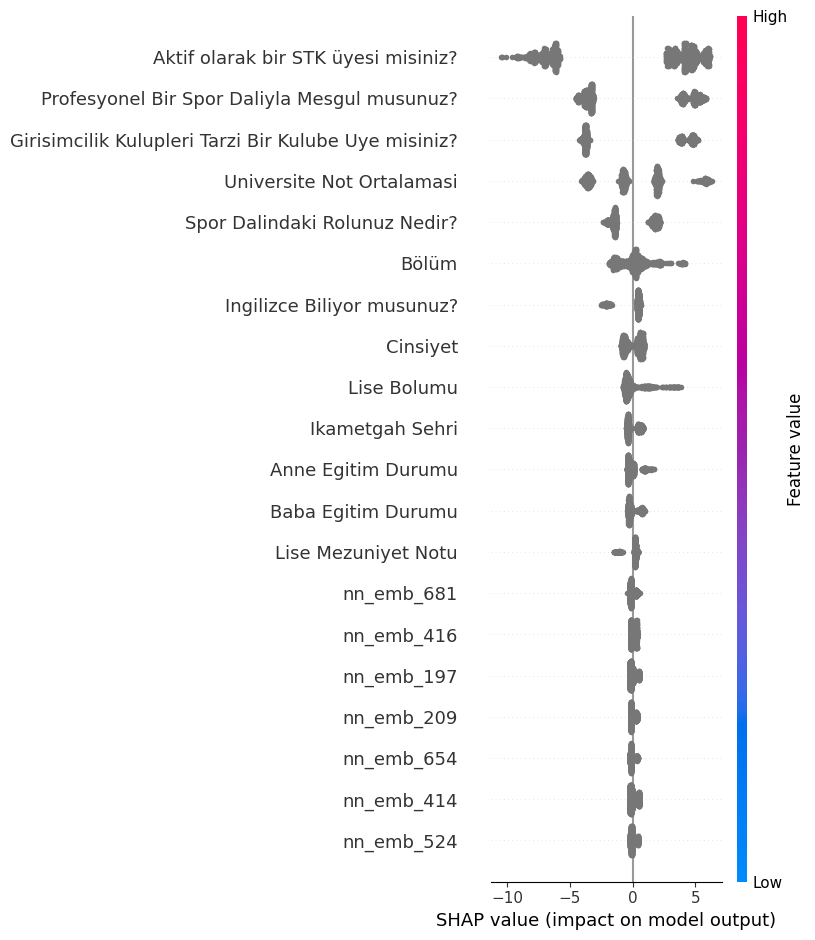

In [26]:
shap.summary_plot(shap_values, X_valid)

In [27]:
y_pred = model.predict(test_df.fillna('nan').astype(str))

In [28]:
test_df["Degerlendirme Puani"] = y_pred
test_df["id"] = np.arange(len(test_df))
test_df[["id", "Degerlendirme Puani"]].to_csv("sub_custom.csv", index=False)
test_df[["id", "Degerlendirme Puani"]].head()


,id,Degerlendirme Puani
0,0,33.627798
1,1,20.821223
2,2,14.172877
3,3,17.254133
4,4,39.045904
